In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
!pip install seaborn

     |████████████████████████████████| 292 kB 971 kB/s eta 0:00:01


In [3]:
# use seaborn plotting defaults
import seaborn as sns
sns.set()

(-1.0, 3.5)

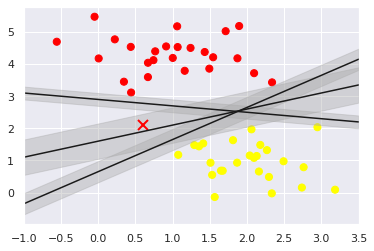

In [61]:
## Tham khảo từ https://insights.magestore.com/posts/xay-dung-clustering-model-bang-giai-thuat-k-means-voi-thu-vien-scikit-learn-skills-ai
# make_blobs: Tạo bộ dữ liệu gồm các điểm (sample) ngẫu nhiên trong không gian)
# n_sample: số lượng sample 
# center=2: Dữ liệu sẽ được phân bố ngẫu nhiên "có chủ đích" để mà các điểm sẽ chia thành 2 nhóm (2 cụm) mà ta có thể tìm hyperlance giữa 2 nhóm đó
# Random_state: Xác định con số ngẫu nhiên được tạo ra cho quá trình tái tạo dataset. Gắn 1 số nguyên để tái tạo lại kết quả thông qua việc gọi nhiều hàm
# Cluster_std: độ lệch chuẩn của những cụm dữ liệu
# X[:,0] là tọa độ x (Xét cột thứ nhất)
# X[:,1] là tọa độ y (xét cột thứ hai)
# s là độ đậm của màu sắc
# c=y lấy màu sắc theo nhãn (theo cụm)

from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=50, centers=2,random_state=0,cluster_std=0.6)
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m, b,d in [(1,0.65,0.33),(0.5, 1.6,0.55),(-0.2, 2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit,yfit, '-k')
    plt.fill_between(xfit,yfit - d, yfit + d,edgecolor = 'none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1,3.5)
# Theo dõi sự thay đổi của đồ thị khi random_state  tăng dần

# for i in np.arange(0,9):
#     X,y = make_blobs(n_samples=50, centers=2,random_state=i,cluster_std=0.8)
#     plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
#     plt.savefig(f'watch_random_state={i}.png')

In [48]:
print(X)

[[ 1.19866542  1.74122504]
 [ 1.73272596  1.87561972]
 [ 1.58510026  4.40112734]
 [ 2.17153334  4.13966072]
 [ 2.1084813   1.13964118]
 [ 2.96678807 -0.090197  ]
 [ 3.56178808 -0.18054359]
 [ 2.06366754  2.32636006]
 [ 2.03272174  1.24032916]
 [-0.38874607  5.86440764]
 [ 1.96050262  5.26569121]
 [-0.02596621  4.92577961]
 [ 1.10022802  4.60631734]
 [ 1.3586298   0.43458393]
 [ 1.66781904  3.71005531]
 [ 1.22672424  3.62051074]
 [ 0.66640862  4.06194513]
 [ 2.37714083  0.34981559]
 [ 0.26604148  2.71915015]
 [ 0.893695    4.63226613]
 [ 1.54780985  0.60747073]
 [ 2.34036064  1.46292219]
 [ 1.32942883  0.93921998]
 [ 1.51729916  0.61002113]
 [ 2.63853997  1.00084999]
 [ 2.79207378  3.14029479]
 [ 0.56854833  3.95332789]
 [-1.06612177  4.8266822 ]
 [ 2.19720844  0.57623891]
 [ 2.47031647  3.52196502]
 [ 2.2218875   1.67897489]
 [ 0.25989683  4.61330933]
 [ 1.33136066  4.57072679]
 [-0.3148482   4.1335951 ]
 [ 2.20249345  5.47927434]
 [ 1.8060255   0.94259593]
 [ 2.1567972   1.21925515]
 

In [49]:
print(X[:,1])

[ 1.74122504  1.87561972  4.40112734  4.13966072  1.13964118 -0.090197
 -0.18054359  2.32636006  1.24032916  5.86440764  5.26569121  4.92577961
  4.60631734  0.43458393  3.71005531  3.62051074  4.06194513  0.34981559
  2.71915015  4.63226613  0.60747073  1.46292219  0.93921998  0.61002113
  1.00084999  3.14029479  3.95332789  4.8266822   0.57623891  3.52196502
  1.67897489  4.61330933  4.57072679  4.1335951   5.47927434  0.94259593
  1.21925515  5.46720613 -0.33133129  3.35928158  1.26788946  4.18270156
 -0.48336242  1.61832485  4.15404025  1.67318103  2.414375    3.16777298
  0.75372379  4.4288665 ]


In [50]:
print(y)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


In [62]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [63]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X,Y,P,colors='k',
        levels=[-1,0,1], alpha=0.5,
        linestyle=['--','-','--']
    )

    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                    model.support_vectors_[:,1],
                    s=300,linewidth=1,facecolors='none'
        );
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/tmp/ipykernel_250/1045809146.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors='k',


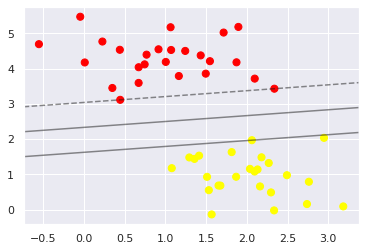

In [64]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [66]:
def plot_svm(N=10,ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)

    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(X,y)

    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)

fig, ax = plt.subplot(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi, N in zip(ax, [60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>